In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors


In [3]:

from mlxtend.plotting import plot_decision_regions
import pandas as pd

In [4]:
def knn_comparision(data, k):
    X=data[['x1','x2']].values
    y=data['y'].astype(int).values
    clf=neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)
    plot_decision_regions(X,y,clf=clf,legend=2)
    plt.title("KNN with k")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

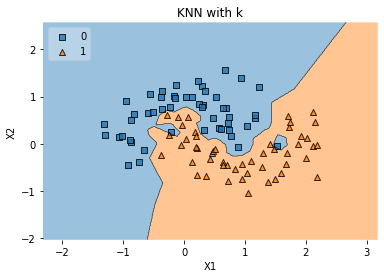

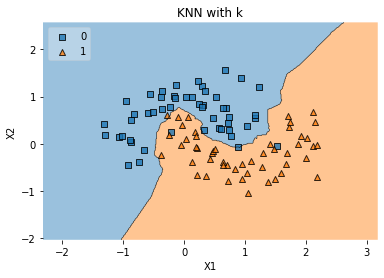

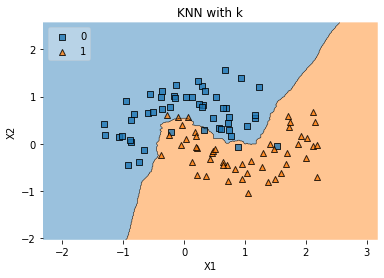

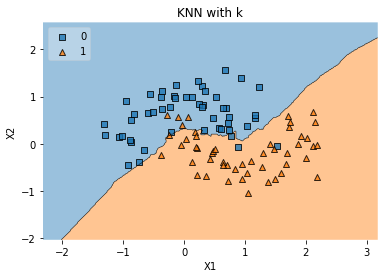

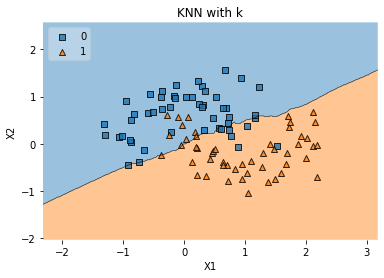

In [5]:
data = pd.read_csv('1.ushape.csv', names=['x1', 'x2', 'y'])
for i in [1, 5, 15, 30, 45]:
    knn_comparision(data, i)

In [20]:
#simple cross validation
#split the dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn import model_selection
names=['x','y','class']
df=pd.read_csv('1.ushape.csv', names=names,header=None)
print(df.head())

          x         y  class
0  0.031595  0.986988    0.0
1  2.115098 -0.046244    1.0
2  0.882490 -0.075756    0.0
3 -0.055144 -0.037332    1.0
4  0.829545 -0.539321    1.0


In [21]:
from sklearn.metrics import accuracy_score
x=np.array(df.iloc[:,0:2])
y=np.array(df['class'])
x_tr,x_test,y_tr,y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
x_tr,x_cv,y_tr,y_cv=model_selection.train_test_split(x_tr,y_tr,test_size=0.3)
for i in range(1,30,2):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    pred=knn.predict(x_cv)
    #evaluating accuracy score 
    acc=accuracy_score(y_cv,pred,normalize=True)*float(100)
    print("ACCURACY SCORE FOR k=%d is %d%%"%(i,acc))

ACCURACY SCORE FOR k=1 is 80%
ACCURACY SCORE FOR k=3 is 95%
ACCURACY SCORE FOR k=5 is 90%
ACCURACY SCORE FOR k=7 is 95%
ACCURACY SCORE FOR k=9 is 95%
ACCURACY SCORE FOR k=11 is 95%
ACCURACY SCORE FOR k=13 is 90%
ACCURACY SCORE FOR k=15 is 80%
ACCURACY SCORE FOR k=17 is 76%
ACCURACY SCORE FOR k=19 is 76%
ACCURACY SCORE FOR k=21 is 76%
ACCURACY SCORE FOR k=23 is 76%
ACCURACY SCORE FOR k=25 is 76%
ACCURACY SCORE FOR k=27 is 76%
ACCURACY SCORE FOR k=29 is 76%


In [34]:
#finding the accuracy of testing data
knn=neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x_tr,y_tr)
pred=knn.predict(x_test)
acc=accuracy_score(y_test,pred,normalize=True)*float(100)
print('ACCURACY SCORE FOR k=1 is %d%%' % (acc))

ACCURACY SCORE FOR k=1 is 93%
